In [1]:
#Selecting n points from N points.
n = int(input())
N = int(input())

5
1000


In [2]:
#Helper function to calculate the pdf of length of leftmost interval
def aux3(n,N,pDen,hArr): #pDen[i][j] = u(L_i = j) = (1-j/N)^(i) - (1-(j+1)/N)^(i)
  lim = int(N/n)
  for j in range(lim+1):
    hArr[n][j] = hArr[n-1][j]*(1-j/N)
    pDen[n][j] = hArr[n][j]
  for j in range(lim):
    pDen[n][j] = pDen[n][j] - hArr[n][j+1]

In [4]:
#Function to calculate the pdf of length of leftmost interval
def aux2(n,N,pDen):
  hArr = [[1.0 for j in range(N+1)] for i in range(n+1)]
  for i in range(1,n+1):
    aux3(i,N,pDen,hArr)

In [6]:
# Function to calculate P(M^N_n >= x) = M[N][n][x]
def aux(n,N,M):
  pDen = [[0.0 for j in range(N+1)] for i in range(n+1)]
  aux2(n,N,pDen)
  maxlim = N//n
  for j in range(maxlim+1):
    if(j <= N):
      M[N][0][j] = 1.0
  for i in range(1,n+1):
    for j in range(maxlim+1):
      for k in range(j,N+1):
        M[N][i][j] += (M[N-k][i-1][j])*(pDen[i][k])

In [7]:
M = [[[0.0 for k in range(N+1)] for j in range(n+1)] for i in range(N+1)]
for i in range(n,N+1):
  aux(n,i,M)

In [9]:
#main array which stores P(M^N_n = x) = M[N][n][x]-M[N][n][x+1]
main = [[[0.0 for k in range(N+1)] for j in range(n+1)] for i in range(N+1)]
ans = 0
for i in range(N+1):
  for j in range(n+1):
    for k in range(N):
      main[i][j][k] = M[i][j][k]-M[i][j][k+1]

for i in range(N+1):
  for j in range(n+1):
    main[i][j][N] = M[i][j][N]

In [11]:
ans = sum(i*main[N][n][i] for i in range(1,N))
print(ans)

20.95978098550244


In [10]:
import matplotlib.pyplot as plt

In [16]:
#Plottting Expected value of N/(n+1)^2 vs simulated values using Discrete Approach
x = [i for i in range(100,N)]
yTrue = [i/((n+1)*(n+1)) for i in range(100,N)]
ySim = [sum(i*main[j][n][i] for i in range(1,N)) for j in range(100,N)]

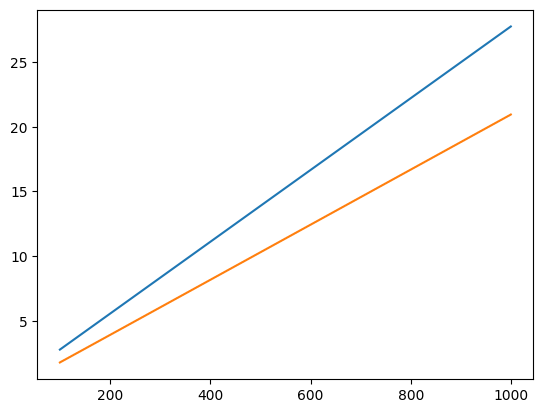

In [17]:
plt.plot(x,yTrue)
plt.plot(x,ySim)